In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
employeeAttritionPrediction = pd.read_csv('employee_attrition_dataset.csv')

In [6]:
columns = employeeAttritionPrediction.columns.tolist()
columns

['employee_id',
 'employee_age',
 'employee_gender',
 'department',
 'job_role',
 'monthly_income',
 'years_at_company',
 'years_in_current_role',
 'attrition']

In [7]:
employeeAttritionPrediction.rename(columns={"attrition": "actual_conversion"}, inplace=True)

In [8]:
employeeAttritionPrediction['actual_conversion'].value_counts()

actual_conversion
0    10132
1     9877
Name: count, dtype: int64

In [9]:
employeeAttritionPrediction.head()

,employee_id,employee_age,employee_gender,department,job_role,monthly_income,years_at_company,years_in_current_role,actual_conversion
0,1001,22,Male,HR,Intern,45796,11,3,0
1,1002,40,Female,Sales,Associate,30861,12,6,0
2,1003,64,Male,HR,Manager,133695,14,8,1
3,1004,48,Male,Engineering,Manager,149880,1,2,1
4,1005,62,Female,Engineering,Intern,140269,4,7,1


In [10]:
# Check for missing values
print("Missing values in the dataset:")
print(employeeAttritionPrediction.isnull().sum())

Missing values in the dataset:
employee_id              0
employee_age             0
employee_gender          0
department               0
job_role                 0
monthly_income           0
years_at_company         0
years_in_current_role    0
actual_conversion        0
dtype: int64


In [11]:
# Display basic statistics of the dataset
print("Basic statistics of the dataset:")
print(employeeAttritionPrediction.describe())

Basic statistics of the dataset:
        employee_id  employee_age  monthly_income  years_at_company  \
count  20009.000000  20009.000000    20009.000000      20009.000000   
mean   11005.000000     40.593983    89512.770053         10.485931   
std     5776.245104     14.114726    34793.784554          5.780687   
min     1001.000000     18.000000    30003.000000          1.000000   
25%     6003.000000     28.000000    58784.000000          5.000000   
50%    11005.000000     40.000000    89495.000000         10.000000   
75%    16007.000000     53.000000   119521.000000         15.000000   
max    21009.000000     65.000000   149944.000000         20.000000   

       years_in_current_role  actual_conversion  
count           20009.000000       20009.000000  
mean                5.482533           0.493628  
std                 2.870107           0.499972  
min                 1.000000           0.000000  
25%                 3.000000           0.000000  
50%                 5.00000

In [12]:
# Check for class imbalance
print("Conversion rate in the dataset:")
print(employeeAttritionPrediction['actual_conversion'].value_counts(normalize=True))


Conversion rate in the dataset:
actual_conversion
0    0.506372
1    0.493628
Name: proportion, dtype: float64


In [13]:
# Display data types of each column
print("Data types of each column:")
print(employeeAttritionPrediction.dtypes)

Data types of each column:
employee_id               int64
employee_age              int64
employee_gender          object
department               object
job_role                 object
monthly_income            int64
years_at_company          int64
years_in_current_role     int64
actual_conversion         int64
dtype: object


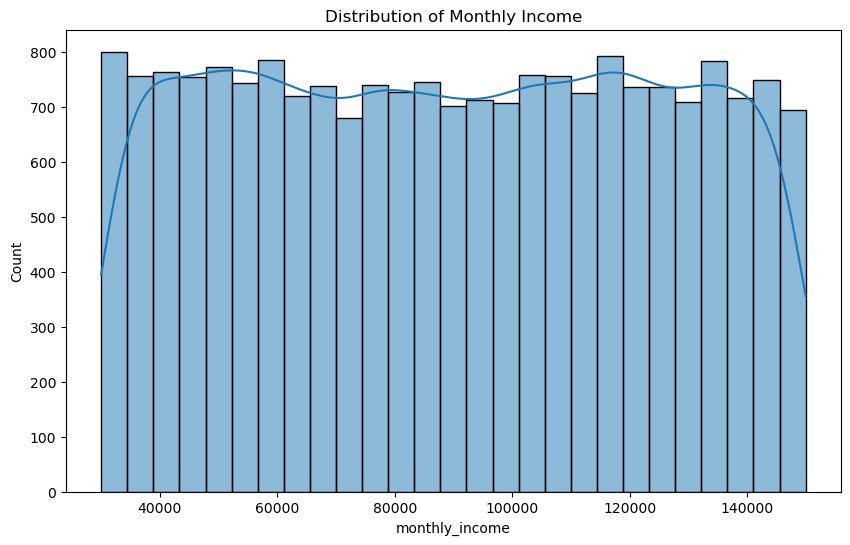

In [14]:
# Plot the distribution of numeric features
plt.figure(figsize=(10, 6))
sns.histplot(employeeAttritionPrediction['monthly_income'], kde=True)
plt.title('Distribution of Monthly Income')
plt.show()

In [15]:
columns = employeeAttritionPrediction.columns.tolist()
columns

['employee_id',
 'employee_age',
 'employee_gender',
 'department',
 'job_role',
 'monthly_income',
 'years_at_company',
 'years_in_current_role',
 'actual_conversion']

In [19]:
# Display data types of each column
print("Data types of each column:")
print(employeeAttritionPrediction.dtypes)

Data types of each column:
employee_id              int64
employee_age             int64
employee_gender           int8
department                int8
job_role                  int8
monthly_income           int64
years_at_company         int64
years_in_current_role    int64
actual_conversion        int64
dtype: object


In [20]:
# Encode categorical variables
employeeAttritionPrediction['employee_gender'] = employeeAttritionPrediction['employee_gender'].astype('category').cat.codes
employeeAttritionPrediction['department'] = employeeAttritionPrediction['department'].astype('category').cat.codes
employeeAttritionPrediction['job_role'] = employeeAttritionPrediction['job_role'].astype('category').cat.codes


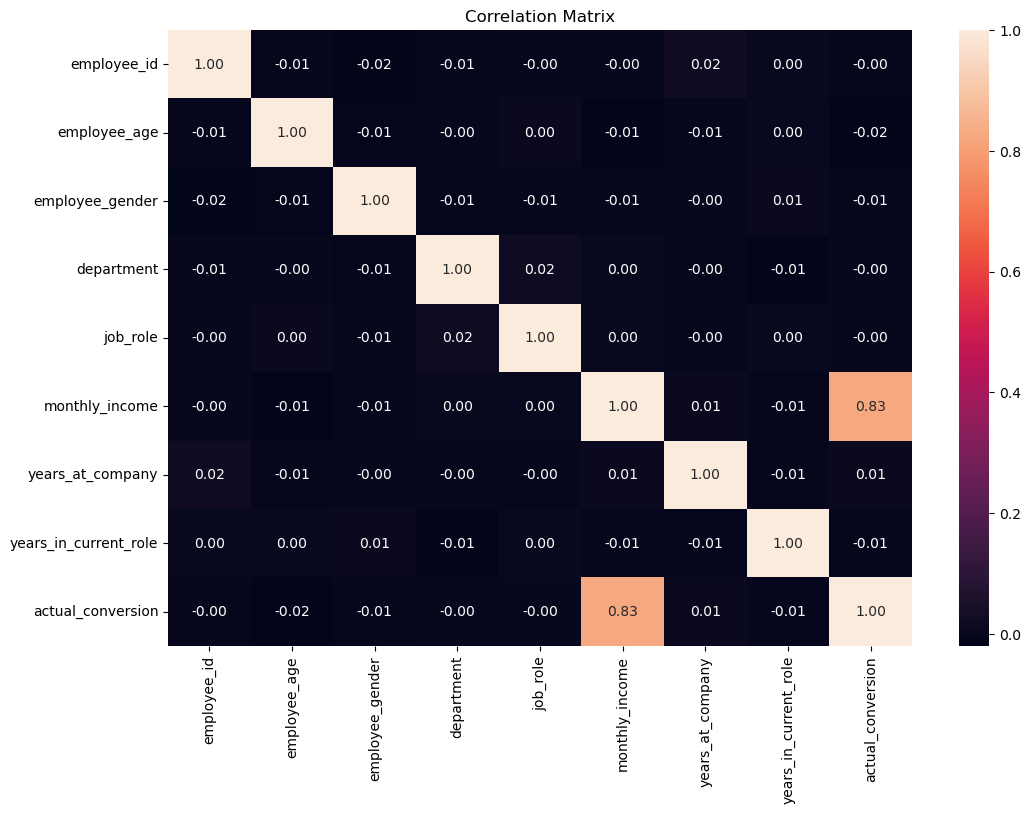

In [21]:
# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(employeeAttritionPrediction.corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [22]:
# Summary statistics by conversion
conversion_summary = employeeAttritionPrediction.groupby('actual_conversion').mean()
print("Summary statistics by conversion:")
print(conversion_summary)

Summary statistics by conversion:
                    employee_id  employee_age  employee_gender  department  \
actual_conversion                                                            
0                  11031.878306     40.838630         0.502171    2.015101   
1                  10977.427761     40.343019         0.497115    2.011947   

                   job_role  monthly_income  years_at_company  \
actual_conversion                                               
0                  1.497335    61159.389360         10.451934   
1                  1.493166   118598.165739         10.520806   

                   years_in_current_role  
actual_conversion                         
0                               5.499803  
1                               5.464817  


In [23]:
# Extract features and target variable
X = employeeAttritionPrediction[['monthly_income']]
y = employeeAttritionPrediction['actual_conversion']

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the test set results
y_pred = model.predict(X_test)

In [25]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[1994   57]
 [  50 1901]]


In [26]:
print("Classification Report:")
class_report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2051
           1       0.97      0.97      0.97      1951

    accuracy                           0.97      4002
   macro avg       0.97      0.97      0.97      4002
weighted avg       0.97      0.97      0.97      4002



In [27]:
print("Accuracy Score:")
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

Accuracy Score:
0.973263368315842


In [28]:
# Save the predictions and evaluation results to a CSV file
predictions = pd.DataFrame({
    'employee_id': X_test.index,
    'actual': y_test,
    'predicted': y_pred
})

In [29]:
fin_df = pd.DataFrame()

In [30]:
fin_df['monthly_income'] = X_test

In [31]:
fin_df['actual_conversion'] = y_test

In [32]:
fin_df['predicted_conversion'] = y_pred

In [33]:
fin_df['employee_id'] = fin_df.index + 1

In [34]:
cols = ['employee_id', 'monthly_income', 'actual_conversion','predicted_conversion']
fin_df = fin_df[cols]

In [35]:
fin_df.head()

,employee_id,monthly_income,actual_conversion,predicted_conversion
15439,15440,58879,0,0
13948,13949,86116,0,0
16648,16649,83062,0,0
17809,17810,66742,0,0
12601,12602,122265,1,1


In [36]:
fin_df['employee_id'].count()

4002

In [37]:
round((employeeAttritionPrediction['actual_conversion'].value_counts().sum())*0.2,0)

4002.0

In [38]:
columns = employeeAttritionPrediction.columns.tolist()
columns

['employee_id',
 'employee_age',
 'employee_gender',
 'department',
 'job_role',
 'monthly_income',
 'years_at_company',
 'years_in_current_role',
 'actual_conversion']

In [39]:
merged_df = pd.merge(fin_df[['employee_id', 'monthly_income', 'actual_conversion','predicted_conversion']], 
                     
                     employeeAttritionPrediction[['employee_id',
 'employee_age',
 'employee_gender',
 'department',
 'job_role',
 'years_at_company',
 'years_in_current_role']], 
                     on="employee_id", how="left")

In [40]:
cols = ['employee_id',
 'employee_age',
 'employee_gender',
 'department',
 'job_role',
 'monthly_income',
 'years_at_company',
 'years_in_current_role',
 'actual_conversion',
         'predicted_conversion']

merged_df = merged_df[cols]

In [41]:
merged_df.head(5)

,employee_id,employee_age,employee_gender,department,job_role,monthly_income,years_at_company,years_in_current_role,actual_conversion,predicted_conversion
0,15440,48.0,1.0,4.0,1.0,58879,5.0,8.0,0,0
1,13949,35.0,0.0,0.0,2.0,86116,18.0,2.0,0,0
2,16649,26.0,1.0,2.0,3.0,83062,8.0,4.0,0,0
3,17810,18.0,0.0,4.0,1.0,66742,13.0,6.0,0,0
4,12602,56.0,1.0,4.0,3.0,122265,11.0,8.0,1,1


In [42]:
merged_df.to_csv('employeeAttritionPrediction_output.csv', index=False)

In [43]:
# Evaluate the model
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("Classification Report:")
class_report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Save confusion matrix, classification report, and accuracy score to the CSV file
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual_0', 'Actual_1'], columns=['Predicted_0', 'Predicted_1'])
class_report_df = pd.DataFrame(class_report).transpose()
evaluation_results = pd.DataFrame({'Metric': ['Accuracy'], 'Score': [accuracy]})

Confusion Matrix:
[[1994   57]
 [  50 1901]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2051
           1       0.97      0.97      0.97      1951

    accuracy                           0.97      4002
   macro avg       0.97      0.97      0.97      4002
weighted avg       0.97      0.97      0.97      4002

Accuracy Score:
0.973263368315842


In [44]:
conf_matrix_df

,Predicted_0,Predicted_1
Actual_0,1994,57
Actual_1,50,1901


In [46]:
class_report_df

,precision,recall,f1-score,support
0,0.975538,0.972209,0.973871,2051.000000
1,0.970889,0.974372,0.972627,1951.000000
accuracy,0.973263,0.973263,0.973263,0.973263
macro avg,0.973213,0.973290,0.973249,4002.000000
weighted avg,0.973272,0.973263,0.973264,4002.000000


In [47]:
evaluation_results

,Metric,Score
0,Accuracy,0.973263


In [48]:
# Write to Excel
with pd.ExcelWriter('model_evaluation_results_employeeAttritionPrediction.xlsx') as writer:
    predictions.to_excel(writer, sheet_name='Predictions', index=False)
    conf_matrix_df.to_excel(writer, sheet_name='Confusion_Matrix')
    class_report_df.to_excel(writer, sheet_name='Classification_Report')
    evaluation_results.to_excel(writer, sheet_name='Accuracy_Score')

In [49]:
print("Employee Attrition Prediction Model has been built successfully.")

Employee Attrition Prediction Model has been built successfully.
